# Menganalisis Risiko Gagal Bayar Peminjam

Tugas Anda adalah menyiapkan laporan untuk divisi kredit suatu bank. Anda akan mencari tahu pengaruh status perkawinan seorang nasabah dan jumlah anak yang dimilikinya terhadap probabilitas gagal bayar dalam pelunasan pinjaman. Pihak bank sudah memiliki beberapa data mengenai kelayakan kredit nasabah.

Laporan Anda akan dipertimbangkan pada saat membuat **penilaian kredit** untuk calon nasabah. **Penilaian kredit** digunakan untuk mengevaluasi kemampuan calon peminjam untuk melunasi pinjaman mereka.

[Dalam *notebook* ini, Anda dapat menemukan petunjuk dan instruksi singkat serta arahan untuk berfikir. Jangan abaikan petunjuk tersebut karena mereka dirancang untuk membekali Anda dengan struktur pengerjaan proyek dan akan membantu Anda menganalisis apa yang sedang Anda lakukan secara mendalam. Sebaliknya, buatlah agar laporan ini terlihat seolah-olah dikirimkan oleh Anda kepada rekan satu tim Anda untuk menunjukkan temuan Anda - mereka tidak perlu tahu bahwa Anda mendapatkan bantuan eksternal dari kami! Untuk membantu Anda, kami menempatkan semua petunjuk yang harus Anda hapus dalam tanda kurung siku.]

[Sebelum Anda masuk ke dalam analisis data Anda, jelaskan tujuan proyek dan hipotesis yang akan Anda uji.]

## Buka *file* data dan baca informasi umumnya.

[Mulailah dengan mengimpor *library* dan memuat datanya. Anda mungkin akan menyadari bahwa Anda memerlukan *library* tambahan saat Anda telah mengerjakan proyek ini, dan itu merupakan hal yang normal. Hanya saja, pastikan untuk memperbarui bagian ini jika dibutuhkan.]

In [ ]:
# Muat semua *library*

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Muat datanya

try:
    df = pd.read_csv('credit_scoring_eng.csv')
except:
    df = pd.read_csv('/datasets/credit_scoring_eng.csv') 

## Soal 1. Eksplorasi data

**Deskripsi Data**
- `children` - jumlah anak dalam keluarga
- `days_employed` - pengalaman kerja nasabah dalam hari
- `dob_years` - usia nasabah dalam tahun
- `education` - tingkat pendidikan nasabah
- `education_id` - pengidentifikasi untuk tingkat pendidikan nasabah
- `family_status` - pengidentifikasi untuk status perkawinan nasabah
- `family_status_id` - tanda pengenal status perkawinan
- `gender` - jenis kelamin nasabah
- `income_type` - jenis pekerjaan
- `debt` - apakah nasabah memiliki hutang pembayaran pinjaman
- `total_income` - pendapatan bulanan
- `purpose` - tujuan mendapatkan pinjaman

[Sekarang saatnya mengeksplor data kita. Anda perlu melihat berapa banyak kolom dan baris yang dimiliki oleh data, serta mencermati beberapa baris data untuk memeriksa potensi masalah dengan data.]

In [ ]:
# Mari kita lihat berapa banyak baris dan kolom yang dimiliki oleh dataset kita
df.shape

(21525, 12)

In [ ]:
# Mari tampilkan N baris pertama
df.head(n= 15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


1. Pada kolom 'days_employed' terdapat angka minus & NaN. Dan angka yang ditampilkan akan lebih memudahkan jika dirubah ke int.
2. Pada kolom 'education' ada ketidaksesuaian dalam penulisan huruf kapital. Ada bagusnya jika ditulis dalam lowercase semua.
3. Pada kolom 'total_income' ada nilai NaN, pada index ke-12, mungkin bukan nilai yang hilang(mungkin ada retiree yang tidak memiliki income lagi). Nilai NaN akan di isi 0.
4. Pada kolom 'purpose'isinya susah di kelompokkan karena ada kategori yang seharusnya sama tapi di tulis dengan tulisan berbeda. Contohnya pada index ke-4 isinya 'to have a wedding' dan di index ke-8 'having a wedding'. Purposenya sama yaitu wedding tetapi ditulis dengan tulisan yang berbeda.
5. Terdapat nilai janggal di index 4 kolom 'days_employed yang isinya 340266.072047. Jika nilai itu di 360(1 tahun) hasilnya lebih dari 900 dan itu tidak mungkin orang telah bekerja selama 900 tahun lebih


In [ ]:
# Dapatkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000




Melalui pengamatan saya, terdapat nilai yang janggal

1. Max dan min dari kolom children yang terhilat janggal (20 & -1) 
    
2. Banyak angka yang janggal pada kolom days_employed. Nilai mean, min, max, 25%, 50%, 75% pada kolom ini terlihat janggal dan juga terdapat nilai yang hilang pada kolom ini
    
3. Nilai min pada kolom dob_years adalah 0, ini merupakan kesalahan karena dob_years tidak mungkin bernilai 0
    
4. Terdapat nilai yang hilang pada kolom ini
    




Ada beberapa kolom yang kehilangan nilainya.

Nilai hilang terdapat pada kolom days_employed dan kolom total_income masing masing sebanyak 2174 baris. Dan pada kolom days_employed terdapat banyak nilai yang janggal (nilai minus dan nilai yang luar biasa tinggi)



In [ ]:
# Mari kita lihat tabel yang difilter dengan nilai yang hilang di kolom pertama yang mengandung data yang hilang

df[df['days_employed'].isna()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding



kelihatan sekilas bahwa nilai yang hilang tampak simetris, tetapi belum tentu benar karena output yang keluar hanya berdasarkan 'days_employed' yang bernilai NaN. Harus dilakukan code ulang dengan parameter 'days_employed' dan 'total_income'.

In [ ]:
# Mari kita terapkan beberapa kondisi untuk memfilter data dan melihat jumlah baris dalam tabel yang telah difilter.

df[df['days_employed'].isna() & df['total_income'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          2174 non-null   int64  
 1   days_employed     0 non-null      float64
 2   dob_years         2174 non-null   int64  
 3   education         2174 non-null   object 
 4   education_id      2174 non-null   int64  
 5   family_status     2174 non-null   object 
 6   family_status_id  2174 non-null   int64  
 7   gender            2174 non-null   object 
 8   income_type       2174 non-null   object 
 9   debt              2174 non-null   int64  
 10  total_income      0 non-null      float64
 11  purpose           2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB




Jumlahnya sama, kesimpulannya jika kolom 'days_employed' = NaN, maka kolom 'total_income' = NaN



---------


Persentase nilai yang hilang adalah sekitar 10% (2174/21525), 10.09% to be exact. Menurut expert data, kehilangan 10% data akan membuat analisis menjadi bias(5% masih di tolerir) maka harus dicari penyebab kenapa data tsb hilang dan akan di isi valuenya




---------


Langkah selanjutnya adalah mencari penyebab kenapa data tsb hilang

----



Analisis baru:
    
<br/> 

1.  Jika kolom 'days_employed' = NaN, maka kolom 'total_income' = NaN. ini dapat dilihat pada cell diatas dengan command membuat tabel yg isinya days_employed = null & total income = null. Total baris yang dihasilkan adalah 2174 atau sama dengan jumlah baris yang hilang pada dua kolom tersebut
2. Data yang hilang adalah sebanyak 2174/21525 (10.09%). Jika <5% data yang hilang data tersebut dapat di-exclude. Rujukan : https://pressbooks.library.upei.ca/montelpare/chapter/working-with-missing-data/
3. Akan dicari menyebab hilangnya data tersebut



In [ ]:
# Mari kita periksa nasabah yang tidak memiliki data tentang karakteristik yang teridentifikasi dan kolom dengan nilai yang hilang

df[df['days_employed'].isna() & df['total_income'].isna()].head(n=10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
65,0,NaN,21,secondary education,1,unmarried,4,M,business,0,NaN,transactions with commercial real estate
67,0,NaN,52,bachelor's degree,0,married,0,F,retiree,0,NaN,purchase of the house for my family
72,1,NaN,32,bachelor's degree,0,married,0,M,civil servant,0,NaN,transactions with commercial real estate
82,2,NaN,50,bachelor's degree,0,married,0,F,employee,0,NaN,housing
83,0,NaN,52,secondary education,1,married,0,M,employee,0,NaN,housing


**Membuat tabel baru yang hanya berisi missing value untuk mengecek distribusinya**

In [ ]:
nan_columns = df[df['days_employed'].isna() & df['total_income'].isna()]

# Membuat tabel baru yang hanya berisi missing value dari 'days_employed' dan 'total_income'

In [ ]:
nan_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          2174 non-null   int64  
 1   days_employed     0 non-null      float64
 2   dob_years         2174 non-null   int64  
 3   education         2174 non-null   object 
 4   education_id      2174 non-null   int64  
 5   family_status     2174 non-null   object 
 6   family_status_id  2174 non-null   int64  
 7   gender            2174 non-null   object 
 8   income_type       2174 non-null   object 
 9   debt              2174 non-null   int64  
 10  total_income      0 non-null      float64
 11  purpose           2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


In [ ]:
# Periksalah distribusinya

nan_columns['children'].value_counts(normalize = True)
# Memeriksa distribusi kolom children

 0     0.661914
 1     0.218491
 2     0.093836
 3     0.016559
 20    0.004140
 4     0.003220
-1     0.001380
 5     0.000460
Name: children, dtype: float64



Analisis pada tabel missing value, kolom `children`
    
Dari 2174 data, kolom children didominasi oleh children = 0. Dan children = 5 berada di posisi terendah.



In [ ]:
nan_columns['dob_years'].value_counts(normalize = True)

# Memeriksa distribusi kolom dob_years

34    0.031739
40    0.030359
31    0.029899
42    0.029899
35    0.029439
36    0.028979
47    0.027139
41    0.027139
30    0.026679
28    0.026219
57    0.025759
58    0.025759
54    0.025299
38    0.024839
56    0.024839
37    0.024379
52    0.024379
39    0.023459
33    0.023459
50    0.023459
51    0.022999
45    0.022999
49    0.022999
29    0.022999
43    0.022999
46    0.022079
55    0.022079
48    0.021159
53    0.020239
44    0.020239
60    0.017939
61    0.017479
62    0.017479
64    0.017019
32    0.017019
27    0.016559
23    0.016559
26    0.016099
59    0.015639
63    0.013339
25    0.010580
24    0.009660
66    0.009200
65    0.009200
21    0.008280
22    0.007820
67    0.007360
0     0.004600
68    0.004140
69    0.002300
20    0.002300
71    0.002300
70    0.001380
72    0.000920
19    0.000460
73    0.000460
Name: dob_years, dtype: float64



Analisis pada tabel missing value, kolom `dob_years`
    
Dari 2174 data, kolom ini memiliki 56 nilai unik. 10 data teratas didominasi umur dengan range 28-47 dan 10 data terbawah didominasi umur 67 - 73 dan umur 19-20. Ada juga umur 0 yang mana dapat dikatakan kesalahan data.



In [ ]:
nan_columns['education'].value_counts(normalize = True)

# Memeriksa distribusi kolom education

secondary education    0.647654
bachelor's degree      0.228151
SECONDARY EDUCATION    0.030819
Secondary Education    0.029899
some college           0.025299
Bachelor's Degree      0.011500
BACHELOR'S DEGREE      0.010580
primary education      0.008740
Some College           0.003220
SOME COLLEGE           0.003220
PRIMARY EDUCATION      0.000460
Primary Education      0.000460
Name: education, dtype: float64



Analisis pada tabel missing value, kolom `education`
    
Dari 2174 data, value secondary education berada pada posisi paling atas dan primary education berada di posisi terbawah. Data ini harus di rapihkan terlebih dahulu, proses merapikan data akan dilakukan pada chapter transformasi data



In [ ]:
nan_columns['family_status'].value_counts(normalize = True)

# Memeriksa distribusi kolom family_status

married              0.568997
civil partnership    0.203312
unmarried            0.132475
divorced             0.051518
widow / widower      0.043698
Name: family_status, dtype: float64



Analisis pada tabel missing value, kolom `family_status`
    
Dari 2174 data, kolom ini didominasi oleh married sebanyak 50%


In [ ]:
nan_columns['income_type'].value_counts(normalize = True)

# Memeriksa distribusi kolom income_type

employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64



Analisis pada tabel missing value, kolom `income_type`
    
Dari 2174 data, kolom income_type ini didominasi oleh employee. Entrepreneur variable yang paling sedikit pada kolom ini



In [ ]:
nan_columns['debt'].value_counts()

# Memeriksa distribusi kolom debt

0    2004
1     170
Name: debt, dtype: int64



Analisis pada tabel missing value, kolom `debt`
    
Dari 2174 data, nasabah yang gagal membayar kredit hanya sekitar 7%





Berdasarkan tabel yang berisi missing value dari days_employed dan total_income di atas. Dapat dilihat bahwa:

1. Tabel yang hilang ini didominasi oleh children = 0
2. Value missing berdasarkan dob_years lumayan terdistribusi
3. Tabel yang hilang ini didominasi oleh 'education' = 'secondary education'
4. Tabel yang hilang ini didominasi oleh 'family_status' = 'married'
5. Tabel yang hilang ini didominasi oleh dengan 'income_type' = 'employee'

------

Gagasan sementara yaitu data hilang secara **random**. Dikarenakan tidak ada pola yang dapat di ambil dari distribusi tabel yang berisi missing values



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
# Memeriksa distribusi di seluruh *dataset*
df['children'].value_counts(normalize = True)

# Memeriksa distribusi seluruh dataset pada kolom children

 0     0.657329
 1     0.223833
 2     0.095470
 3     0.015331
 20    0.003531
-1     0.002184
 4     0.001905
 5     0.000418
Name: children, dtype: float64

mengecek distribusi dari **seluruh dataset**
 
Analisis pada selurus dataset kolom `children`
    
Dari total 21525 baris, kolom children ini didominasi variabel 0
    


In [ ]:
df['dob_years'].value_counts()

# Memeriksa distribusi seluruh dataset pada kolom dob_years

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

mengecek distribusi dari **seluruh dataset**   
 
Analisis pada selurus dataset kolom `dob_years`:
    
Distribusi pada kolom ini mirip dengan distribusi pada tabel yang berisi missing value di atas. Pada posisi atas didominasi nasabah yang berusia 30-48 tahun dan pada posisi bawah didominasi oleh nasabah yang berusia 19-20 dan 60-75 tahun
    


In [ ]:
df['education'].value_counts(normalize = True)

# Memeriksa distribusi seluruh dataset pada kolom education

secondary education    0.638792
bachelor's degree      0.219187
SECONDARY EDUCATION    0.035865
Secondary Education    0.033031
some college           0.031034
BACHELOR'S DEGREE      0.012729
Bachelor's Degree      0.012451
primary education      0.011614
Some College           0.002184
SOME COLLEGE           0.001347
PRIMARY EDUCATION      0.000790
Primary Education      0.000697
graduate degree        0.000186
GRADUATE DEGREE        0.000046
Graduate Degree        0.000046
Name: education, dtype: float64

mengecek distribusi dari **seluruh dataset**  
 
Analisis pada selurus dataset kolom `education`:
    
Kolom ini didominasi oleh variable secondary education dengan persentase 63% dari total data yang ada
    


In [ ]:
df['family_status'].value_counts(normalize = True)

# Memeriksa distribusi seluruh dataset pada kolom family_status

married              0.575145
civil partnership    0.194053
unmarried            0.130685
divorced             0.055517
widow / widower      0.044599
Name: family_status, dtype: float64

mengecek distribusi dari **seluruh dataset** 
 
Analisis pada selurus dataset kolom `family_status`:
    
Kolom ini didominasi oleh variable married dan variable widow berada di posisi terbawah, distribusi ini mirip seperti tabel dengan missing value sebelumnya
    


In [ ]:
df['income_type'].value_counts(normalize = True)

# Memeriksa distribusi seluruh dataset pada kolom income_type

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
entrepreneur                   0.000093
unemployed                     0.000093
paternity / maternity leave    0.000046
student                        0.000046
Name: income_type, dtype: float64

mengecek distribusi dari **seluruh dataset**   
 
Analisis pada selurus dataset kolom `income_type`:
    
Kolom ini didominasi variable employee sebesar 51% dari total data
    


In [ ]:
df['debt'].value_counts()

# Memeriksa distribusi seluruh data set pada kolom debt

0    19784
1     1741
Name: debt, dtype: int64

mengecek distribusi dari **seluruh dataset**   
 
Analisis pada selurus dataset kolom `income_type`:
    
Sama seperti tabel dengan missing value sebelumnya, tabel ini didominasi dengan nasabah yang tidak memiliki riwayat gagal membayar kredit
    




Setelah melihat distribusi **seluruh dataset** dan membandingkannya dengan **tabel yang berisi missing value**, saya melihat bahwa distribusi dari kedua tabel ini mirip. Hanya ada beberapa perbedaan contohnya pada kolom `education`. Hal ini memperkuat kesimpulan bahwa data ini hilang secara random 

----



Karena ada perbedaan distribusi pada kolom `education` maka saya akan melakukan pengecekan ulang pada kolom ini

-----

In [ ]:
# Periksa penyebab dan pola lain yang dapat mengakibatkan nilai yang hilang
# Memeriksa nilai unik education pada dataframe yang berisi missing value

df[df['total_income'].isna()]['education'].nunique()

12

In [ ]:
# Memeriksa nilai unik education pada dataframe yang tidak memiliki missing value

df[df['total_income'].notnull()]['education'].nunique()

15



-------

Hasil nilai unik kedua tabel ini berbeda tetapi ini tidak dapat jadi patokan apakah ada pola missing value yang terdapat pada kolom ini karena kolom ini memiliki variable yang sama hanya saja ada yang tulis menggunakan uppercase dan lowercase. Kesimpulan saya pada titik ini tetap sama yaitu kehilangan data ini terjadi secara random

---------



Nilai unik education pada baris yang hilang lebih sedikit. Tapi ini tidak dapat jadi acuan karena nilai unik pada kolom education belum dirapihkan karena masih ada karakter yang bukan lowercase



In [ ]:
# Periksa pola lainnya - jelaskan pola tersebut

nan_columns[nan_columns['dob_years'] == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
1890,0,NaN,0,bachelor's degree,0,unmarried,4,F,employee,0,NaN,housing
2284,0,NaN,0,secondary education,1,widow / widower,2,F,retiree,0,NaN,property
4064,1,NaN,0,secondary education,1,civil partnership,1,M,business,0,NaN,housing renovation
5014,0,NaN,0,secondary education,1,married,0,F,business,0,NaN,buy real estate
6411,0,NaN,0,bachelor's degree,0,civil partnership,1,F,retiree,0,NaN,wedding ceremony
6670,0,NaN,0,Bachelor's Degree,0,divorced,3,F,retiree,0,NaN,buy residential real estate
8574,0,NaN,0,secondary education,1,married,0,F,employee,0,NaN,property
12403,3,NaN,0,secondary education,1,married,0,M,employee,0,NaN,transactions with commercial real estate
13741,0,NaN,0,secondary education,1,civil partnership,1,F,employee,0,NaN,having a wedding
19829,0,NaN,0,secondary education,1,married,0,F,employee,0,NaN,housing




Disini dapat dilihat bahwa ada beberapa nilai null yang kolom dob_years == 0. Tetapi belum bisa dikatakan pola karena parameter ini hanya sebesar 10% dari total dob_years == 0

-----



Data yang hilang kemungkinan besar akan saya isi dengan rata rata atau mean dengan kolom dob_years sebagai acuan

------



Drop duplicates, str lower, memperbaiki value yang janggal atau tidak masuk akal, mengisi missing value dengan mean atau median


In [ ]:
# Mari kita lihat semua nilai di kolom pendidikan untuk memeriksa ejaan apa yang perlu diperbaiki
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [ ]:
# Perbaiki pencatatan jika diperlukan
# Membuat semua isi dari kolom education menjadi lowercase
df['education'] = df['education'].str.lower()

In [ ]:
# Periksa semua nilai di kolom untuk memastikan bahwa kita telah memperbaikinya dengan tepat
df['education'].unique()

# Perbaikan selesai

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

-----
**Kolom education DONE**

----

In [ ]:
# Mari kita lihat distribusi nilai pada kolom `children`
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64



Terdapat 2 value yang aneh(20 dan -1)
1. Tidak mungkin seseorang mempunyai 20 anak
2. Tidak mungkin seseorang mempunya -1 anak

Kesimpulan saya tentang bagaimana nilai ini bisa seperti ini adalah kesalahan yang dilakukan manusia ketika menginput data

Kesalahan pada nilai 20 akan saya ganti menjadi 2 karena ini merupakan kesalahan input

Kesalahan pada nilai -1 akan saya bikin dua penyelesaian. Pertama baris dengan children -1, days_employed nan dan total_income nan akan saya drop karena baris tersebut terlalu corrupt untuk di proses. Lalu sisanya akan saya isi dengan mean/median dari kolom children



In [ ]:
# [perbaiki data berdasarkan keputusan Anda]
df.loc[df['children'] == 20 , 'children'] = 2

# Nilai 20 telah dirubah menjadi 2

In [ ]:
# Langkah selanjutnya mencari mean dan dari children > 0

children = df[df['children'] > 0]
children['children'].mean()

1.4025105744303452

In [ ]:
# Selanjutnya mencari median dari children > 0

children['children'].sort_values(ascending = False)
children['children'].median()

1.0

In [ ]:
# Perbaiki nilai children = -1 dengan 1 (median)

df.loc[df['children'] == -1 , 'children'] = 1

In [ ]:
# Periksa kembali kolom `children` untuk memastikan bahwa semuanya telah diperbaiki
df['children'].unique()
# Data telah diperbaiki

array([1, 0, 3, 2, 4, 5])

----

**Kolom children DONE**

------

In [ ]:
# Temukan data yang bermasalah di `days_employed`, jika memang terdapat masalah, dan hitung persentasenya
# Dari awal kita dapat melihat nilai yang minus pada kolom ini
# Dan juga nilai yang tidak masuk akal seperti diatas ratusan ribu
# Mari kita lihat nilai yang diatas 0

days_employed_upper = df[(df['days_employed'] > 0)].sort_values(by = 'days_employed')
days_employed_upper.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
20444,0,328728.720605,72,secondary education,1,widow / widower,2,F,retiree,0,15443.094,purchase of the house for my family
9328,2,328734.923996,41,bachelor's degree,0,married,0,M,retiree,0,20319.600,transactions with my real estate
17782,0,328771.341387,56,secondary education,1,married,0,F,retiree,0,10983.688,transactions with commercial real estate
14783,0,328795.726728,62,bachelor's degree,0,married,0,F,retiree,0,12790.431,buying my own car
7229,1,328827.345667,32,secondary education,1,civil partnership,1,F,retiree,0,19546.075,to have a wedding


In [ ]:
# Mari kita lihat nilai yang di bawah atau sama dengan 0
days_employed_lower = df[(df['days_employed'] <= 0)].sort_values(by = 'days_employed')
days_employed_lower.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
16335,1,-18388.949901,61,secondary education,1,married,0,F,employee,0,29788.629,real estate transactions
4299,0,-17615.563266,61,secondary education,1,married,0,F,business,0,19609.719,purchase of the house
7329,0,-16593.472817,60,bachelor's degree,0,married,0,F,employee,0,19951.655,going to university
17838,0,-16264.699501,59,secondary education,1,married,0,F,employee,0,8198.235,to buy a car
16825,0,-16119.687737,64,secondary education,1,married,0,F,employee,0,14644.430,buy residential real estate


**Insight**

1. Kita dapat melihat tidak ada value  = 0
2. value > 0 dimulai dari 328728 (ratusan ribu)
3. value <= 0 dimulai dari -24

Jika kita bagi 328728/365 = 900.7, 900++ tahun adalah angka yang mustahil. Maka value > 0 akan dievaluasi lagi dan akan diganti dengan nilai yang reasonable.

Dan juga nilai dari kolom ini akan dirubah jadi int agar tidak ada koma.

**Seluruh** value dari kolom days_employed harus diperbaiki



Semua data akan di setting ulang


**Kesimpulan Sementara**

Tidak ada days_employed == 0

Kita mulai dari data yang minus, Lihat tabel diatas(days_employed_lower)

Nilai tertinggi adalah -14381.545844

Setelh melihat days_employed_lower, saya dapat menyimpulkan bahwa nilai yang minus itu adalah nilai yang benar adalah data yang bernilai minus dan data yang janggal adalah data yang berada > 0 

Hal ini dapat disimpulkan dari sintaks days_employed_lower.head(n=50) atau yang berada pada cell diatas. Jika tanda minus itu dihilangkan maka angka tersebut akan terlihat masuk akal.

**Dan angka yang diatas > 300000 semuanya tidak masuk akal, nanti akan dirubah sekalian dengan nilai yang hilang di chapter selanjutnya**


In [ ]:
# Atasi nilai yang bermasalah, jika ada
# Seperti kesimpulan di atas, nilai < 0  akan dihilangkan minusnya

df['days_employed'] = df['days_employed'].abs()

In [ ]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


-----

**Kolom days_employed DONE**

-----

In [ ]:
# Periksa `dob_years` untuk nilai yang mencurigakan dan hitung persentasenya
df['dob_years'].unique()


array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])


Terdapat angka 0. Akan diganti dengan nilai mean atau median



In [ ]:
# Atasi masalah pada kolom `dob_years`, jika terdapat masalah
# Identifikasi masalah
dob_years = df[df['dob_years'] == 0]
dob_years['income_type'].unique()

# Terdapat 'retiree', 'employee', 'business', 'civil servant' dengan dob_years = 0

array(['retiree', 'employee', 'business', 'civil servant'], dtype=object)

In [ ]:
# Membuat pivot tabel untuk melihat kesamaan hasil median

df.pivot_table(index = 'income_type', values = 'dob_years', aggfunc = 'median')

,dob_years
income_type,
business,39.0
civil servant,40.0
employee,39.0
entrepreneur,42.5
paternity / maternity leave,39.0
retiree,60.0
student,22.0
unemployed,38.0


In [ ]:
# Membuat pivot tabel untuk melihat kesamaan hasil mean

df.pivot_table(index = 'income_type', values = 'dob_years', aggfunc = 'mean')

,dob_years
income_type,
business,39.697542
civil servant,40.636737
employee,39.821027
entrepreneur,42.500000
paternity / maternity leave,39.000000
retiree,59.063019
student,22.000000
unemployed,38.000000


In [ ]:
df.loc[(df.income_type == 'retiree') & (df.dob_years == 0), 'dob_years'] = 60
# Mengganti baris dengan (df.income_type == 'retiree') & (df.dob_years == 0) menjadi 60(median)

df.loc[(df.income_type == 'employee') & (df.dob_years == 0), 'dob_years'] = 39
# Mengganti baris dengan (df.income_type == 'employee') & (df.dob_years == 0) menjadi 39(median)

df.loc[(df.income_type == 'business') & (df.dob_years == 0), 'dob_years'] = 39
# Mengganti baris dengan (df.income_type == 'business') & (df.dob_years == 0) menjadi 39(median)

df.loc[(df.income_type == 'civil servant') & (df.dob_years == 0), 'dob_years'] = 40
# Mengganti baris dengan (df.income_type == 'civil servant') & (df.dob_years == 0) menjadi 40(median)

In [ ]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki

df['dob_years'].unique()

# dob_years = 0 telah di rubah semuanya

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51, 60, 59, 29, 55, 58, 71, 22, 73, 66,
       69, 19, 72, 70, 74, 75])

-------

**Kolom dob_years DONE**

-------

In [ ]:
# Mari kita lihat nilai untuk kolom ini
df['family_status'].unique()


array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [ ]:
# Atasi nilai yang bermasalah di `family_status`, jika ada

### Tidak ada masalah

-------

**Kolom family_status DONE**

-------

In [ ]:
# Mari kita liat nilai dalam kolom ini
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [ ]:
# Mencari letak gender XNA berada
df.loc[df['gender'] == 'XNA']

# Gender XNA cuma terdapat 1, selanjutnya akan dicari tahu apakah value tsb akan diisi oleh M atau F atau di drop

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


In [ ]:
# Mencari pola agar dapat menentukan apakah nasabah  XNA merupakan M atau F
df_xna = df[(df['children'] == 0) & (df['education'] == 'some college') & (df['family_status'] == 'civil partnership') & (df['income_type'] == 'business') ]
df_xna = df_xna[df_xna['purpose'].str.contains('estate')].reset_index(drop = True)
df_xna

# Disini saya memfilter tabel agar semuanya terlihat setara dengan kasus XNA
# dimana dapat dilihat bahwa 100% dari karakteristik dari gender XNA merupakan F
# Nilai XNA akan dirubah menjadi F

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,0,597.273402,21,some college,2,civil partnership,1,F,business,0,13912.788,transactions with commercial real estate
1,0,802.530741,29,some college,2,civil partnership,1,F,business,0,28421.429,real estate transactions
2,0,219.732426,24,some college,2,civil partnership,1,F,business,0,40112.181,building a real estate
3,0,839.710094,22,some college,2,civil partnership,1,F,business,0,13870.793,building a real estate
4,0,2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate
5,0,2596.030110,44,some college,2,civil partnership,1,F,business,0,31735.658,transactions with commercial real estate
6,0,316.432989,25,some college,2,civil partnership,1,F,business,0,29015.884,buy residential real estate
7,0,668.953423,40,some college,2,civil partnership,1,F,business,0,16797.947,transactions with commercial real estate


In [ ]:
# Atasi nilai-nilai yang bermasalah, jika ada
#df.loc[df['gender'] == 'XNA' , 'gender'] = 'F'

# Mengganti value XNA menjadi F

df['gender'] = df['gender'].replace(['XNA'], 'F')

In [ ]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df['gender'].unique()

# Value dari kolom gender hanya memiliki isi F ataupun M

array(['F', 'M'], dtype=object)

-------

**Kolom gender DONE**

-------

In [ ]:
# Mari kita lihat nilai dalam kolom ini
df['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

In [ ]:
# Atasi nilai yang bermasalah, jika ada

#### Tidak ada nilai yang salah

-------

**Kolom income_type DONE**

-------



Terdapat duplikat. Duplikat akan di drop karena dari hasil pengecekan duplikat yang ada memang benar benar duplikat karena semua nilainya sama. Tidak mungkin 1 orang memiliki value yang sama di semua kolom



In [ ]:
# Periksa duplikat
duplicated_first = df[df.duplicated(keep = 'first')]
duplicated_first

# Keep first

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family
3290,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
4182,1,NaN,34,bachelor's degree,0,civil partnership,1,F,employee,0,NaN,wedding ceremony
4851,0,NaN,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony
5557,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,NaN,64,secondary education,1,married,0,F,retiree,0,NaN,supplementary education
21032,0,NaN,60,secondary education,1,married,0,F,retiree,0,NaN,to become educated
21132,0,NaN,47,secondary education,1,married,0,F,employee,0,NaN,housing renovation
21281,1,NaN,30,bachelor's degree,0,married,0,F,employee,0,NaN,buy commercial real estate


In [ ]:
# Atasi duplikat, jika ada
df.drop_duplicates(inplace=True)

# Drop duplicates

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21454 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21454 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


In [ ]:
# Lakukan pemeriksaan terakhir untuk mengecek apakah kita memiliki duplikat
df.duplicated().sum()

0

In [ ]:
# Periksa ukuran dataset yang sekarang Anda miliki setelah manipulasi pertama yang Anda lakukan
df.shape

(21454, 12)



1. Ada beberapa perubahan di kolom children, yaitu mengganti angka 20 dan -1
2. Ada sedikit perubahan pada days_employed, membuat semua nilai menjadi absolut dan setelah ini akan di lakukan pengisian data yang hilang dan data yang diatas 300000
3. Pada dob_years dilakukan perubahan pada nilai 0
4. Pada kolom education dilakukan str lower
5. Dikolom gender dilakukan perubahan pada value XNA
6. Menerapkan drop_duplicates()

Baris tabel yang awalnya 21525 menjadi 21454. Sekitar 0.3% baris telah di drop



# Bekerja dengan nilai yang hilang

In [ ]:
# Temukan dictionary

dict = {'children': {'mean': round(df['children'].mean(), 2), 
                     'median': df['children'].sort_values().median(),
                     'min' : df['children'].min(),
                     'max' : df['children'].max(),
                     'missing value' : 0},
       'days_employed': {'mean': round(df['days_employed'].mean(), 2), 
                     'median': df['days_employed'].sort_values().median(),
                     'min' : df['days_employed'].min(),
                     'max' : df['days_employed'].max(),
                     'missing value' : 2103},
       'dob_years': {'mean': round(df['dob_years'].mean(), 2), 
                     'median': df['dob_years'].sort_values().median(),
                     'min' : df['dob_years'].min(),
                     'max' : df['dob_years'].max(),
                     'missing value' : 0},
       'total_income': {'mean': round(df['total_income'].mean(), 2), 
                     'median': df['total_income'].sort_values().median(),
                     'min' : df['total_income'].min(),
                     'max' : df['total_income'].max(),
                     'missing value' : 2103}}

df_dict = pd.DataFrame(data = dict)
df_dict
# Show dictionary

,children,days_employed,dob_years,total_income
mean,0.48,66914.730000,43.47,26787.570
median,0.00,2194.220567,42.00,23202.870
min,0.00,24.141633,19.00,3306.762
max,5.00,401755.400475,75.00,362496.645
missing value,0.00,2103.000000,0.00,2103.000


### Memperbaiki nilai yang hilang di `total_income`



Kolom total_income yang bernilai null akan di ganti semuanya

------


Usia akan dikategorikan menjadi:
1. Remaja (<19)
2. Dewasa (19-35)
3. Dewasa akhir (36-45)
4. Paruh Baya (46-60)
5. Lansia(>61)

Usia 19-35 dikategorikan masa awal dalam berkarir

Usia 36-45 dikategorikan masa prima dalam berkarir

Usia 46-60 dikategorikan masa transisi menuju pensiunan

-------

In [ ]:
# Mari kita tulis sebuah fungsi untuk menghitung kategori usia
def age_category(row):
    age = row['dob_years']
    
    if age < 19:
        return 'remaja'
    elif age <= 35:
        return 'dewasa awal'
    elif age <= 45:
        return 'dewasa akhir'
    elif age <= 60:
        return 'paruh baya'
    elif age > 60:
        return 'lansia'
    

In [ ]:
# Lakukan pengujian untuk melihat apakah fungsi Anda bekerja atau tidak
coba_1 = age_category(df.iloc[4])
print(coba_1)

# Fungsi berfungsi dengan baik

paruh baya


In [ ]:
# Buatlah kolom baru berdasarkan fungsi

df['age_category'] = df.apply(age_category, axis = 1)

In [ ]:
# Periksa bagaimana nilai di dalam kolom baru

df['age_category'].reset_index()

,index,age_category
0,0,dewasa akhir
1,1,dewasa akhir
2,2,dewasa awal
3,3,dewasa awal
4,4,paruh baya
...,...,...
21449,21520,dewasa akhir
21450,21521,lansia
21451,21522,dewasa akhir
21452,21523,dewasa akhir


In [ ]:
# Buat tabel tanpa nilai yang hilang dan tampilkan beberapa barisnya untuk memastikan semuanya berjalan dengan baik

df_notnull = df[(df['days_employed'].notnull()) & (df['total_income'].notnull())]

**Jika kita hanya menggunakan age_category sebagai patokan maka hasil dari mean/median akan lebih liar**

**Maka dari itu akan ditambahkan income_type sebagai tambahan patokan dalam membuat mean/median dari data yang hilang**

In [ ]:
df_dewasa_awal = df_notnull[df_notnull['age_category'] == 'dewasa awal']

df_dewasa_awal.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,dewasa awal
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,dewasa awal
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,dewasa awal
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,dewasa awal
15,1,972.364419,26,secondary education,1,married,0,F,employee,0,18691.345,construction of own property,dewasa awal


In [ ]:
# Perhatikan nilai rata-rata untuk pendapatan berdasarkan faktor yang telah Anda identifikasi

df_dewasa_awal['total_income'].mean()

26836.105974121998

In [ ]:
# Perhatikan nilai median untuk pendapatan berdasarkan faktor yang telah Anda identifikasi
df_dewasa_awal['total_income'].sort_values().median()

23522.246

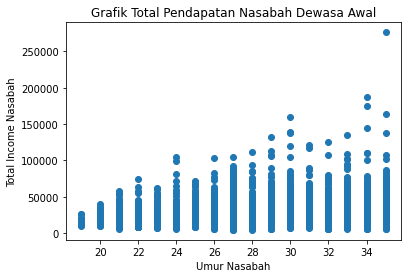

In [ ]:
plt.scatter(df_dewasa_awal['dob_years'], df_dewasa_awal['total_income'])

# String
xlab = 'Umur Nasabah'
ylab = 'Total Income Nasabah'
title = 'Grafik Total Pendapatan Nasabah Dewasa Awal'

# Membuat label
plt.xlabel(xlab)
plt.ylabel(ylab)

# Membuat judul

plt.title(title)

# Menampilkan plot
plt.show()

In [ ]:
df_dewasa_akhir = df_notnull[df_notnull['age_category'] == 'dewasa akhir']

df_dewasa_akhir.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,dewasa akhir
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,dewasa akhir
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,dewasa akhir
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,dewasa akhir
10,2,4171.483647,36,bachelor's degree,0,married,0,M,business,0,18230.959,buy real estate,dewasa akhir


In [ ]:
df_dewasa_akhir['total_income'].mean()

28635.843090256214

In [ ]:
df_dewasa_akhir['total_income'].sort_values().median()

24768.995000000003

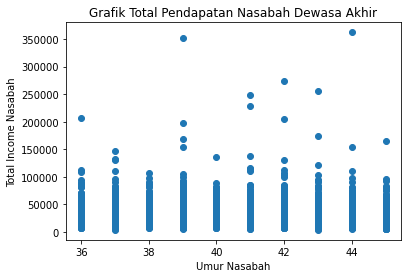

In [ ]:
plt.scatter(df_dewasa_akhir['dob_years'], df_dewasa_akhir['total_income'])

# String
xlab = 'Umur Nasabah'
ylab = 'Total Income Nasabah'
title = 'Grafik Total Pendapatan Nasabah Dewasa Akhir'

# Membuat label
plt.xlabel(xlab)
plt.ylabel(ylab)

# Membuat judul

plt.title(title)

# Menampilkan plot
plt.show()

In [ ]:
df_paruh_baya = df_notnull[df_notnull['age_category'] == 'paruh baya']

df_paruh_baya.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,paruh baya
7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education,paruh baya
13,0,1846.641941,54,some college,2,married,0,F,employee,0,20873.317,car purchase,paruh baya
14,0,1844.956182,56,bachelor's degree,0,civil partnership,1,F,business,1,26420.466,buy residential real estate,paruh baya
18,0,400281.136913,53,secondary education,1,widow / widower,2,F,retiree,0,9091.804,buying a second-hand car,paruh baya


In [ ]:
# Perhatikan nilai rata-rata untuk pendapatan berdasarkan faktor yang telah Anda identifikasi

df_paruh_baya['total_income'].mean()

26367.23196998894

In [ ]:
# Perhatikan nilai median untuk pendapatan berdasarkan faktor yang telah Anda identifikasi
df_paruh_baya['total_income'].sort_values().median()

22852.007

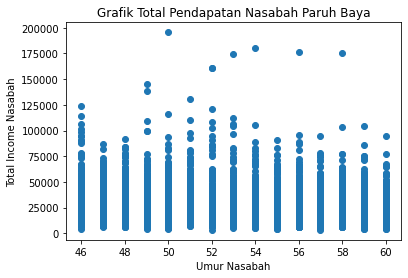

In [ ]:
plt.scatter(df_paruh_baya['dob_years'], df_paruh_baya['total_income'])

# String
xlab = 'Umur Nasabah'
ylab = 'Total Income Nasabah'
title = 'Grafik Total Pendapatan Nasabah Paruh Baya'

# Membuat label
plt.xlabel(xlab)
plt.ylabel(ylab)

# Membuat judul

plt.title(title)

# Menampilkan plot
plt.show()

In [ ]:
df_lansia = df_notnull[df_notnull['age_category'] == 'lansia']

df_lansia.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
25,0,363548.489348,67,secondary education,1,married,0,M,retiree,0,8818.041,buy real estate,lansia
30,1,335581.668515,62,secondary education,1,married,0,F,retiree,0,27432.971,transactions with commercial real estate,lansia
35,0,394021.072184,68,secondary education,1,civil partnership,1,M,retiree,0,12448.908,having a wedding,lansia
50,0,353731.432338,63,secondary education,1,married,0,F,retiree,0,14774.837,cars,lansia
53,0,4219.883386,61,secondary education,1,divorced,3,F,business,0,49832.576,purchase of my own house,lansia


In [ ]:
# Perhatikan nilai rata-rata untuk pendapatan berdasarkan faktor yang telah Anda identifikasi

df_lansia['total_income'].mean()

23057.777452269172

In [ ]:
# Perhatikan nilai median untuk pendapatan berdasarkan faktor yang telah Anda identifikasi
df_lansia['total_income'].sort_values().median()

19637.056

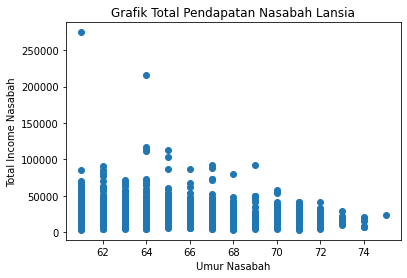

In [ ]:
#plt.plot(df_lansia['total_income'],'o')

plt.scatter(df_lansia['dob_years'], df_lansia['total_income'])

# String
xlab = 'Umur Nasabah'
ylab = 'Total Income Nasabah'
title = 'Grafik Total Pendapatan Nasabah Lansia'

# Membuat label
plt.xlabel(xlab)
plt.ylabel(ylab)

# Membuat judul

plt.title(title)

# Menampilkan plot
plt.show()

In [ ]:
df_notnull.pivot_table(index = 'age_category', columns = 'income_type', values = 'total_income', 
                       aggfunc = 'median', margins = True)

income_type,business,civil servant,employee,entrepreneur,paternity / maternity leave,retiree,student,unemployed,All
age_category,,,,,,,,,
dewasa akhir,28505.919,23202.1090,23190.1320,NaN,8612.661,20319.6000,NaN,32435.6020,24768.995
dewasa awal,26512.761,24368.0150,22261.7270,79866.103,NaN,15378.5635,15712.26,9593.1190,23522.246
lansia,29171.989,24623.8775,23550.5120,NaN,NaN,18412.9250,NaN,NaN,19637.056
paruh baya,28352.413,23847.2850,22745.1130,NaN,NaN,19526.8120,NaN,NaN,22852.007
All,27577.272,24071.6695,22815.1035,79866.103,8612.661,18962.3180,15712.26,21014.3605,23202.870


**Data lebih spesifik dan akan membuat hasil dari total_income lebih akurat**

**Digunakannya median karena ada beberapa data yang terlalu rendah dan ada beberapa data yang nilainya terlalu tinggi seperti yang dapat dilihat dari plot di atas**

In [ ]:
# Fungsi untuk mengisi total_income mising value

def fill_missing_total_income (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [ ]:
# Terapkan fungsi tersebut ke setiap baris

df = fill_missing_total_income(dataframe = df, agg_column = 'income_type', value_column = 'total_income')

In [ ]:
# Memeriksa bagaimana nilai di dalam kolom baru
df['total_income'].reset_index()

,index,total_income
0,0,40620.102
1,1,17932.802
2,2,23341.752
3,3,42820.568
4,4,25378.572
...,...,...
21449,21520,35966.698
21450,21521,24959.969
21451,21522,14347.610
21452,21523,39054.888


In [ ]:
# Periksa apakah kita mendapatkan kesalahan
df[df['total_income'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category


In [ ]:
# Periksa jumlah entri di kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21454 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  float64
 11  purpose           21454 non-null  object 
 12  age_category      21454 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


**Kita tidak mempunyai data mengenai paruh baya dengan income_type entrepreneur maka total_income pada baris ini akan diisi dengan median dari total_income dari kolom age_category = paruh baya**

In [ ]:
df.info()

# Melihat df info
# Kolom total_income sudah sesuai dengan kolom lainnya

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21454 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  float64
 11  purpose           21454 non-null  object 
 12  age_category      21454 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


###  Memperbaiki nilai di `days_employed`

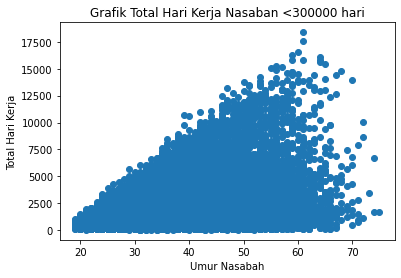

In [ ]:
# Distribusi median dari `days_employed` berdasarkan parameter yang Anda identifikasi
# Ada banyak nilai yang tidak masuk akal yang berada >= 300000

df_1 = df[df['days_employed'] < 300000]

plt.scatter(df_1['dob_years'], df_1['days_employed'])

# String
xlab = 'Umur Nasabah'
ylab = 'Total Hari Kerja'
title = 'Grafik Total Hari Kerja Nasaban <300000 hari'

# Membuat label
plt.xlabel(xlab)
plt.ylabel(ylab)

# Membuat judul

plt.title(title)

# Menampilkan plot
plt.show()

Sebelumnya saya melihat bahwa ada nilai dari kolom ini yang tidak masuk akal, angka tersebut dimulai dari 300000. Lalu saya membuat graph yang berisi nilai yang <300000

Penjelasan Graph:

1. Grafik bergerak naik bersamaan dengan nilai umur
2. Setiap peak dari umur n tidak melebihi dari peak dari umur n+1. Sebagai contoh peak dari total hari kerja pada nasabah umur 20 tahun tidak melebihi peak dari nasabah yang berumur 30 tahun dan seterusnya.

Dari Graph di atas saya mengambil kesimpulan bahwa nilai yang < 300000 merupakan data yang benar dan nilai yang >= 300000 merupakan nilai yang keliru (tidak masuk akal) dan selanjutnya akan direplace dengan nilai mean/median dari data yang benar

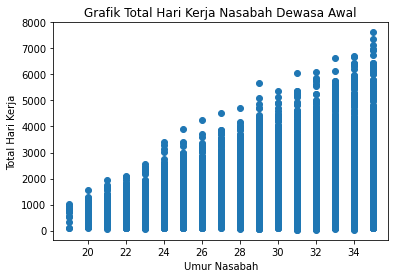

In [ ]:
# Distribusi rata-rata dari `days_employed` berdasarkan parameter yang Anda identifikasi

df_1_dewasa_awal = df_1[df_1['age_category'] == 'dewasa awal']

plt.scatter(df_1_dewasa_awal['dob_years'], df_1_dewasa_awal['days_employed'])

# String
xlab = 'Umur Nasabah'
ylab = 'Total Hari Kerja'
title = 'Grafik Total Hari Kerja Nasabah Dewasa Awal'

# Membuat label
plt.xlabel(xlab)
plt.ylabel(ylab)

# Membuat judul

plt.title(title)

# Menampilkan plot
plt.show()

In [ ]:
df_1.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,dewasa akhir
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,dewasa akhir
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,dewasa awal
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,dewasa awal
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,dewasa awal


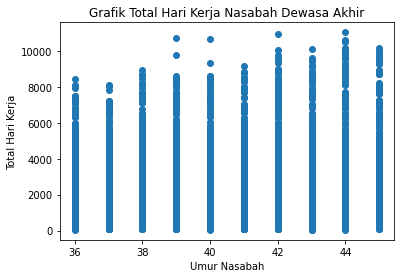

In [ ]:
df_1_dewasa_akhir = df_1[df_1['age_category'] == 'dewasa akhir']

plt.scatter(df_1_dewasa_akhir['dob_years'], df_1_dewasa_akhir['days_employed'])

# String
xlab = 'Umur Nasabah'
ylab = 'Total Hari Kerja'
title = 'Grafik Total Hari Kerja Nasabah Dewasa Akhir'

# Membuat label
plt.xlabel(xlab)
plt.ylabel(ylab)

# Membuat judul

plt.title(title)

# Menampilkan plot
plt.show()

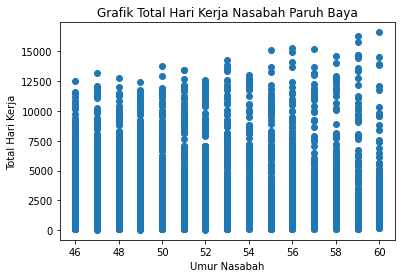

In [ ]:
df_1_paruh_baya = df_1[df_1['age_category'] == 'paruh baya']

plt.scatter(df_1_paruh_baya['dob_years'], df_1_paruh_baya['days_employed'])

# String
xlab = 'Umur Nasabah'
ylab = 'Total Hari Kerja'
title = 'Grafik Total Hari Kerja Nasabah Paruh Baya'

# Membuat label
plt.xlabel(xlab)
plt.ylabel(ylab)

# Membuat judul

plt.title(title)

# Menampilkan plot
plt.show()

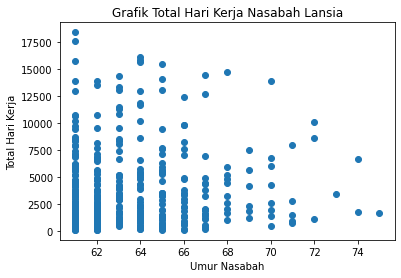

In [ ]:
df_1_lansia = df_1[df_1['age_category'] == 'lansia']

plt.scatter(df_1_lansia['dob_years'], df_1_lansia['days_employed'])

# String
xlab = 'Umur Nasabah'
ylab = 'Total Hari Kerja'
title = 'Grafik Total Hari Kerja Nasabah Lansia'

# Membuat label
plt.xlabel(xlab)
plt.ylabel(ylab)

# Membuat judul

plt.title(title)

# Menampilkan plot
plt.show()



Disini saya akan menggunakan mean karena data terdistribusi dengan merata



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21454 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  float64
 11  purpose           21454 non-null  object 
 12  age_category      21454 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


In [ ]:
# Mari tulis fungsi yang menghitung rata-rata atau median (tergantung keputusan Anda) berdasarkan parameter yang Anda identifikasi

def fill_missing_days_employed (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [ ]:
# Periksa apakah fungsi Anda dapat bekerja

df = fill_missing_days_employed (dataframe = df, agg_column = 'age_category', value_column = 'days_employed')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21454 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     21454 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  float64
 11  purpose           21454 non-null  object 
 12  age_category      21454 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


In [ ]:
df['days_employed'].max()

401755.40047533

In [ ]:
# Ada data yang tidak masuk akal pada kolom ini yaitu >300000
# Data ini akan di set ulang dan dimasukkan nilai median

def set_ulang_days_employed (dataframe, agg_column, value_column):
    grouped_values = dataframe[dataframe['days_employed']<300000].groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column]>300000), value_column] = value
    return dataframe

In [ ]:
df = set_ulang_days_employed (dataframe = df, agg_column = 'age_category', value_column = 'days_employed')
df['days_employed'].max()

18388.949900568383

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21454 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     21454 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  float64
 11  purpose           21454 non-null  object 
 12  age_category      21454 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


In [ ]:
# Periksa apakah fungsi Anda bekerja

df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_category        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21454 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     21454 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  float64
 11  purpose           21454 non-null  object 
 12  age_category      21454 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


In [ ]:
df[df['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category


In [ ]:
df[df['days_employed']>300000]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category


In [ ]:
df['days_employed'] = df['days_employed'].astype('int')


# Mengganti type data days_employed dari float menjadi int

In [ ]:
# Periksa entri di semua kolom - pastikan kita memperbaiki semua nilai yang hilang
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21454 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     21454 non-null  int64  
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  float64
 11  purpose           21454 non-null  object 
 12  age_category      21454 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 2.3+ MB


-----

**DATA TELAH LENGKAP**

-----

## Pengkategorian Data


Data yang dikategorikan adalah sebagai berikut:

1. Berdasarkan kolom 'children' karena mempunyai anak berarti menambah tanggungan (pengeluaran bulanan meningkat) dan secara hipotesis saya ini dapat menghambat dalam pelunasan hutang
2. Berdasarkan kolom 'total_income' karena pemasukan bulanan seseorang akan mempengaruhi sanggup atau tidaknya dia melunasi hutang
3. Berdasarkan kolom 'purpose' karena apakah tujuan dari peminjaman adalah untuk investasi atau kebutuhan primer atau untuk kebutuhan tersier
4. Berdasarkan family_status


In [ ]:
df['purpose'].value_counts()

# Menyederhanakan kolom purpose agak lebih mudah di kategorikan

wedding ceremony                            791
having a wedding                            768
to have a wedding                           765
real estate transactions                    675
buy commercial real estate                  661
housing transactions                        652
buying property for renting out             651
transactions with commercial real estate    650
purchase of the house                       646
housing                                     646
purchase of the house for my family         638
construction of own property                635
property                                    633
transactions with my real estate            627
building a real estate                      624
buy real estate                             621
purchase of my own house                    620
building a property                         619
housing renovation                          607
buy residential real estate                 606
buying my own car                       

In [ ]:
df.loc[df['purpose'].str.contains('wed'), 'purpose'] = 'wedding'
df.loc[df['purpose'].str.contains('real'), 'purpose'] = 'real estate'
df.loc[df['purpose'].str.contains('hous'), 'purpose'] = 'buy/renov house'
df.loc[df['purpose'].str.contains('univ'), 'purpose'] = 'education'
df.loc[df['purpose'].str.contains('edu'), 'purpose'] = 'education'
df.loc[df['purpose'].str.contains('car'), 'purpose'] = 'buy car'
df.loc[df['purpose'].str.contains('proper'), 'purpose'] = 'buy/build property'

In [ ]:
df['purpose'].value_counts()

# Sekarang hanya terdapat 6 kategori

real estate           4464
buy car               4306
education             4013
buy/renov house       3809
buy/build property    2538
wedding               2324
Name: purpose, dtype: int64

In [ ]:
df['debt'].value_counts()

# Disini kita dapat melihat kalau sekitar 8% orang yang gagal melunasi hutang dari seluruh dataset

0    19713
1     1741
Name: debt, dtype: int64

In [ ]:
# Melihat tabel dengan data orang yang gagal melunasi hutang

df_debt = df[df['debt'] == 1].reset_index(drop = True)
df_debt

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
0,0,1844,56,bachelor's degree,0,civil partnership,1,F,business,1,26420.466,real estate,paruh baya
1,0,4649,34,secondary education,1,civil partnership,1,F,employee,1,22249.194,wedding,dewasa awal
2,0,597,25,bachelor's degree,0,unmarried,4,M,employee,1,30759.568,education,dewasa awal
3,0,3745,54,secondary education,1,civil partnership,1,F,retiree,1,18962.318,wedding,paruh baya
4,1,2953,38,secondary education,1,married,0,M,employee,1,13109.661,real estate,dewasa akhir
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,0,960,39,secondary education,1,civil partnership,1,M,business,1,28219.135,education,dewasa akhir
1737,0,612,29,bachelor's degree,0,civil partnership,1,F,employee,1,22410.956,buy/build property,dewasa awal
1738,1,467,28,secondary education,1,married,0,F,employee,1,17517.812,education,dewasa awal
1739,1,2113,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,buy/build property,dewasa akhir


In [ ]:
df_debt['purpose'].value_counts()

# Dapat dilihat bahwa orang yang meminjam uang untuk membeli mobil dan gagal membayar berada diurutan nomor 1

buy car               403
education             370
real estate           336
buy/renov house       256
buy/build property    190
wedding               186
Name: purpose, dtype: int64

In [ ]:
# Tampilkan nilai data yang Anda pilih untuk pengkategorian

df[['children', 'family_status', 'total_income', 'purpose', 'debt' ]]

,children,family_status,total_income,purpose,debt
0,1,married,40620.102,buy/renov house,0
1,1,married,17932.802,buy car,0
2,0,married,23341.752,buy/renov house,0
3,3,married,42820.568,education,0
4,0,civil partnership,25378.572,wedding,0
...,...,...,...,...,...
21520,1,civil partnership,35966.698,buy/renov house,0
21521,0,married,24959.969,buy car,0
21522,1,civil partnership,14347.610,buy/build property,1
21523,3,married,39054.888,buy car,1


[Mari kita memeriksa nilai unik]

In [ ]:
# Periksa nilai unik
# Pada kolom children

df['children'].value_counts()

0    14091
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

In [ ]:
# Periksa nilai unik pada kolom total_income

df['total_income'].value_counts()

22815.1035    1070
27577.2720     502
18962.3180     387
24071.6695     145
17312.7170       2
              ... 
45484.1090       1
27715.4580       1
23834.5340       1
26124.6130       1
41428.9160       1
Name: total_income, Length: 19350, dtype: int64

In [ ]:
df['total_income'].max()

362496.645

In [ ]:
df['total_income'].min()

3306.762

In [ ]:
# Periksa nilai unik pada kolom purpose

df['purpose'].value_counts()

real estate           4464
buy car               4306
education             4013
buy/renov house       3809
buy/build property    2538
wedding               2324
Name: purpose, dtype: int64



Akan dilakuan pengelompokkan dari kolom 'purpose'
1. Kebutuhan primer (education, buy/renov house, wedding)
2. Kebutuhan sekunder (buy car)
3. Kebutuhan tersier (real estate, buy/build property)




In [ ]:
# Mari kita tulis sebuah fungsi untuk mengategorikan data berdasarkan topik umum

def kategori_tujuan (kategori):
    
    #kategori = row['purpose']
    
    if kategori == 'real estate' or kategori == 'buy/build property':
        return 'kebutuhan tersier'
    elif kategori == 'education' or kategori == 'buy/renov house' or kategori == 'wedding':
        return 'kebutuhan primer'
    else:
        return 'kebutuhan sekunder'
    

In [ ]:
# Buat kolom yang memuat kategori dan hitung nilainya
df['purpose_category'] = df['purpose'].apply(kategori_tujuan)
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,purpose_category
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,buy/renov house,dewasa akhir,kebutuhan primer
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,buy car,dewasa akhir,kebutuhan sekunder
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,buy/renov house,dewasa awal,kebutuhan primer
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,education,dewasa awal,kebutuhan primer
4,0,2774,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,paruh baya,kebutuhan primer


In [ ]:
# Lihat semua data numerik di kolom yang Anda pilih untuk pengkategorian
df['children'].value_counts()

0    14091
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

In [ ]:
# Dapatkan kesimpulan statistik untuk kolomnya

df['children'].value_counts(normalize = True)

0    0.656801
1    0.226298
2    0.099189
3    0.015382
4    0.001911
5    0.000420
Name: children, dtype: float64

**Terdapat 65% (lebih dari 50% total nasabah) nasabah yang tidak mempunyai anak**



1. 0 anak - kategori nasabah tidak mempunyai anak
2. mempunyai anak (children >0)



In [ ]:
# Buat fungsi yang melakukan pengkategorian menjadi kelompok numerik yang berbeda berdasarkan rentang

def kategori_anak (children):
    
    #children = row['children']
    
    if children == 0:
        return 'childless'
    else:
        return 'mempunyai anak'

In [ ]:
# Buat kolom yang memuat kategori

df['children_category'] = df['children'].apply(kategori_anak)

df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,purpose_category,children_category
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,buy/renov house,dewasa akhir,kebutuhan primer,mempunyai anak
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,buy car,dewasa akhir,kebutuhan sekunder,mempunyai anak
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,buy/renov house,dewasa awal,kebutuhan primer,childless
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,education,dewasa awal,kebutuhan primer,mempunyai anak
4,0,2774,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,paruh baya,kebutuhan primer,childless


In [ ]:
# Hitung setiap nilai kategori untuk melihat pendistribusiannya
df['children_category'].value_counts()

childless         14091
mempunyai anak     7363
Name: children_category, dtype: int64

In [ ]:
df['children_category'].value_counts(normalize = True)

# Nasabah childless merupakan nasabah terbanyak (60%)

childless         0.656801
mempunyai anak    0.343199
Name: children_category, dtype: float64

Membuat kategori berdasarkan total_income

total_income dibagi menjadi 4 kategori
1. kelas bawah dengan range 0 sampai 9999
2. kelas menengah dengan range 10000 sampai 30000
3. kelas atas dengan range diatas 30000



In [ ]:
# Membuat fungsi kategori dari total_income

def kategori_income (total_income):
    
    #total_income = row['total_income']
    
    if total_income < 10000:
        return 'kelas bawah'
    elif total_income <= 30000:
        return 'kelas menengah'
    else:
        return 'kelas atas'
    

In [ ]:
# Apply fungsi

df['total_income_category'] = df['total_income'].apply(kategori_income)
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,purpose_category,children_category,total_income_category
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,buy/renov house,dewasa akhir,kebutuhan primer,mempunyai anak,kelas atas
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,buy car,dewasa akhir,kebutuhan sekunder,mempunyai anak,kelas menengah
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,buy/renov house,dewasa awal,kebutuhan primer,childless,kelas menengah
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,education,dewasa awal,kebutuhan primer,mempunyai anak,kelas atas
4,0,2774,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,paruh baya,kebutuhan primer,childless,kelas menengah


--------------

**Pengkategorian Data DONE**

--------------

## Memeriksa hipotesis


**Apakah terdapat korelasi antara memiliki anak dengan melakukan pelunasan tepat waktu?**

In [ ]:
# Pivot table pada kolom children

df_category_pivot_children = pd.pivot_table(df, index = 'children', columns = 'debt', 
                                            values = 'total_income', aggfunc = 'count', margins= True)

df_category_pivot_children['% berhasil'] = df_category_pivot_children[0] / df_category_pivot_children['All']*100
df_category_pivot_children['% gagal'] = df_category_pivot_children[1] / df_category_pivot_children['All']*100
df_category_pivot_children['% All'] = df_category_pivot_children['% berhasil'] + df_category_pivot_children['% gagal']

df_category_pivot_children

debt,0,1,All,% berhasil,% gagal,% All
children,,,,,,
0,13028.0,1063.0,14091,92.456178,7.543822,100.0
1,4410.0,445.0,4855,90.834192,9.165808,100.0
2,1926.0,202.0,2128,90.507519,9.492481,100.0
3,303.0,27.0,330,91.818182,8.181818,100.0
4,37.0,4.0,41,90.243902,9.756098,100.0
5,9.0,NaN,9,100.000000,NaN,NaN
All,19713.0,1741.0,21454,91.884963,8.115037,100.0


In [ ]:
# Pivot table pada kolom children_category

df_category_pivot_children_category = pd.pivot_table(df, index = 'children_category', columns = 'debt', 
                                            values = 'total_income', aggfunc = 'count', margins= True)

df_category_pivot_children_category['% berhasil'] = df_category_pivot_children_category[0] / df_category_pivot_children_category['All']*100
df_category_pivot_children_category['% gagal'] = df_category_pivot_children_category[1] / df_category_pivot_children_category['All']*100
df_category_pivot_children_category['% All'] = df_category_pivot_children_category['% berhasil'] + df_category_pivot_children_category['% gagal']

df_category_pivot_children_category

debt,0,1,All,% berhasil,% gagal,% All
children_category,,,,,,
childless,13028,1063,14091,92.456178,7.543822,100.0
mempunyai anak,6685,678,7363,90.791797,9.208203,100.0
All,19713,1741,21454,91.884963,8.115037,100.0


**Kesimpulan**



Data children = 0 atau child_category = childless merupakan nasabah dengan tingkat keberhasilan pelunasan tertinggi



**Jadi kesimpulan saya adalah nasabah yang tidak memiliki anak meningkatkan tingkat keberhasilannya membayar hutang sebesar 22% dibanding jika nasabah tersebut memiliki anak**


**DONE**

------


**Apakah terdapat korelasi antara status keluarga dengan pelunasan tepat waktu?**

In [ ]:
df['family_status'].value_counts()

married              12339
civil partnership     4151
unmarried             2810
divorced              1195
widow / widower        959
Name: family_status, dtype: int64

In [ ]:
# Membuat tabel pivot berdasarkan data berhasil dan gagal bayar dengan status keluarga

df_category_pivot_family = pd.pivot_table(df, index = 'family_status', columns = 'debt', 
                                          values = 'total_income', aggfunc = 'count', margins= True)

df_category_pivot_family['% berhasil'] = df_category_pivot_family[0] / df_category_pivot_family['All']*100
df_category_pivot_family['% gagal'] = df_category_pivot_family[1] / df_category_pivot_family['All']*100
df_category_pivot_family['% All'] = df_category_pivot_family['% berhasil'] + df_category_pivot_family['% gagal']

# Show pivot
df_category_pivot_family

debt,0,1,All,% berhasil,% gagal,% All
family_status,,,,,,
civil partnership,3763,388,4151,90.652855,9.347145,100.0
divorced,1110,85,1195,92.887029,7.112971,100.0
married,11408,931,12339,92.454818,7.545182,100.0
unmarried,2536,274,2810,90.249110,9.750890,100.0
widow / widower,896,63,959,93.430657,6.569343,100.0
All,19713,1741,21454,91.884963,8.115037,100.0





Terdapat 5 kategori pada pivot ini

Persentase kegagalan tertinggi terdapat pada kategori unmarried sekitar 9.7%

Nasabah yang belum menikah memiliki persentase terbesar dalam kegagalan membayar hutang dibandingkan dengan kategori lainnya


Jika dilihat lebih dalam, saya dapat menyederhanakan kategori ini menjadi 2 kategori saja
1. Pernah/masih menikah - married, divorced, widow/widower
2. Belum menikah - unmarried, civil partnership (civil partnership ini masuk ke dalam kategori belum menikah karena secara tingkatan hukumnya civil partnership ini berada di bawah married dan ada banyak hak-hak yang tidak bisa didapatkan walaupun ini termasuk ke dalam hubungan yang diakui hukum)


Setelah melihat ke dua kategori baru ini, kita dapat melihat bahwa persentase kategori 'belum menikah' merupakan kategori dengan tingkat kegagalan tertinggi yaitu 27.8%  lebih tinggi dari kategori 'pernah/masih menikah'



**Kesimpulan saya adalah nasabah yang 'belum menikah' memiliki kecenderungan untuk gagal membayar hutang lebih tinggi daripada nasabah yang 'pernah/masih menikah'**


**DONE**

------

**Apakah terdapat korelasi antara tingkat pendapatan dengan membayar kembali tepat waktu?**

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,purpose_category,children_category,total_income_category
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,buy/renov house,dewasa akhir,kebutuhan primer,mempunyai anak,kelas atas
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,buy car,dewasa akhir,kebutuhan sekunder,mempunyai anak,kelas menengah
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,buy/renov house,dewasa awal,kebutuhan primer,childless,kelas menengah
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,education,dewasa awal,kebutuhan primer,mempunyai anak,kelas atas
4,0,2774,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,paruh baya,kebutuhan primer,childless,kelas menengah


In [ ]:
# Periksa data tingkat pendapatan dan pelunasan tepat waktu
# Hitung gagal bayar berdasarkan tingkat pendapatan

df_category_pivot_income = pd.pivot_table(df, index = 'total_income_category', columns = 'debt', 
                                          values = 'total_income', aggfunc = 'count', margins= True)

df_category_pivot_income['% berhasil'] = df_category_pivot_income[0] / df_category_pivot_income['All']*100
df_category_pivot_income['% gagal'] = df_category_pivot_income[1] / df_category_pivot_income['All']*100
df_category_pivot_income['% All'] = df_category_pivot_income['% berhasil'] + df_category_pivot_income['% gagal']

# Show pivot
df_category_pivot_income

debt,0,1,All,% berhasil,% gagal,% All
total_income_category,,,,,,
kelas atas,5484,436,5920,92.635135,7.364865,100.0
kelas bawah,868,58,926,93.736501,6.263499,100.0
kelas menengah,13361,1247,14608,91.463582,8.536418,100.0
All,19713,1741,21454,91.884963,8.115037,100.0





**Kesimpulan saya adalah nasabah dengan penghasilan kelas menengah dan kelas atas merupakan kategori terbanyak dalam gagal membayar hutang**

**Dan kelas bawah merupakan nasabah dengan rate terendah dalam gagal membayar hutang yaitu sebanyak 6.2% dari total 926 nasabah kelas bawah**

**DONE**

------

**Bagaimana tujuan kredit memengaruhi tingkat gagal bayar?**

In [ ]:
# Periksa persentase tingkat gagal bayar untuk setiap tujuan kredit dan lakukan penganalisisan

df_category_pivot_purpose = pd.pivot_table(df, index = 'purpose_category', columns = 'debt', 
                                          values = 'total_income', aggfunc = 'count', margins= True)

df_category_pivot_purpose['% berhasil'] = df_category_pivot_purpose[0] / df_category_pivot_purpose['All']*100
df_category_pivot_purpose['% gagal'] = df_category_pivot_purpose[1] / df_category_pivot_purpose['All']*100
df_category_pivot_purpose['% All'] = df_category_pivot_purpose['% berhasil'] + df_category_pivot_purpose['% gagal']

# Show pivot
df_category_pivot_purpose

debt,0,1,All,% berhasil,% gagal,% All
purpose_category,,,,,,
kebutuhan primer,9334,812,10146,91.996846,8.003154,100.0
kebutuhan sekunder,3903,403,4306,90.640966,9.359034,100.0
kebutuhan tersier,6476,526,7002,92.487861,7.512139,100.0
All,19713,1741,21454,91.884963,8.115037,100.0





**Jawaban ini bersifat sementara karena di cell selanjutnya saya akan melakukan modifikasi lagi pada kategori ini dan juga pada beberapa kategori lainnya**

**Tujuan kredit dengan kebutuhan sekunder yaitu membeli mobil berada pada tingkat tertinggi dengan persentase kegagalan sebesar 9.3% dari total nasabah yang mengajukan kredit untuk kategori kebutuhan sekunder**

------

**DONE**

# Modifikasi data lebih lanjut

**Disini saya akan buat kategori lain atau pivot lain untuk mendapatkan insight baru**

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,purpose_category,children_category,total_income_category
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,buy/renov house,dewasa akhir,kebutuhan primer,mempunyai anak,kelas atas
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,buy car,dewasa akhir,kebutuhan sekunder,mempunyai anak,kelas menengah
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,buy/renov house,dewasa awal,kebutuhan primer,childless,kelas menengah
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,education,dewasa awal,kebutuhan primer,mempunyai anak,kelas atas
4,0,2774,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,paruh baya,kebutuhan primer,childless,kelas menengah


In [ ]:
# Membuat family_status menjadi 2 kategori agar terlihat lebih simple dan dapat diperlihatkan pada pivot selanjutnya

def kategori_family_status (row):
    
    family_status = row['family_status']
    
    if family_status == 'civil partnership':
        return 'belum menikah'
    elif family_status == 'divorced':
        return 'pernah/sedang menikah'
    elif family_status == 'married':
        return 'pernah/sedang menikah'
    elif family_status == 'unmarried':
        return 'belum menikah'
    else:
        return 'pernah/sedang menikah'
    

In [ ]:
# Menyederhanakan purpose_category menjadi 2 kategori agar terlihat lebih simple dan dapat diperlihatkan pada pivot selanjutnya

def kategori_baru_purpose (row):
    
    purpose_category = row['purpose_category']
    
    if purpose_category == 'kebutuhan tersier':
        return 'kebutuhan sekunder'
    else:
        return purpose_category
    

In [ ]:
# Apply fungsi kategori_baru_purpose

df['purpose_new_category'] = df.apply(kategori_baru_purpose, axis = 1)

In [ ]:
# Apply fungsi kategori_family_status

df['family_category'] = df.apply(kategori_family_status, axis = 1)

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category,purpose_category,children_category,total_income_category,purpose_new_category,family_category
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,buy/renov house,dewasa akhir,kebutuhan primer,mempunyai anak,kelas atas,kebutuhan primer,pernah/sedang menikah
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,buy car,dewasa akhir,kebutuhan sekunder,mempunyai anak,kelas menengah,kebutuhan sekunder,pernah/sedang menikah
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,buy/renov house,dewasa awal,kebutuhan primer,childless,kelas menengah,kebutuhan primer,pernah/sedang menikah
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,education,dewasa awal,kebutuhan primer,mempunyai anak,kelas atas,kebutuhan primer,pernah/sedang menikah
4,0,2774,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,paruh baya,kebutuhan primer,childless,kelas menengah,kebutuhan primer,belum menikah


**Disini saya akan membuat pivot dengan semua pertanyaan dari tugas akhir sprint ini sebagai parameternya untuk melihat sebuah pola**

In [ ]:
tabel_pivot_kompleks = pd.pivot_table(df, index = 'total_income_category', 
                        columns = ['family_category','children_category','purpose_new_category','debt'], 
                        values = 'total_income', aggfunc= 'count', margins = True)


**Alasan kenapa ada beberapa kategori yang disederhanakan adalah agar pivot tabel ini dapat ditampilkan secara baik karena apabila kolom dari dataframe melebihi threshold maka kolom dari dataframe tersebut akan ditampilkan sebagiannya saja (program akan menampilkan '...' jika kolom terlalu banyak)**

In [ ]:
# Show pivot

tabel_pivot_kompleks

family_category          belum menikah                               \
children_category            childless                                
purpose_new_category  kebutuhan primer      kebutuhan sekunder        
debt                                 0    1                  0    1   
total_income_category                                                 
kelas atas                         750   60                519   51   
kelas bawah                        105    5                 73    4   
kelas menengah                    1829  187               1277  132   
All                               2684  252               1869  187   

family_category                                                     \
children_category       mempunyai anak                               
purpose_new_category  kebutuhan primer      kebutuhan sekunder       
debt                                 0    1                  0   1   
total_income_category                                                
kelas atas                         320   22                174  26   
kelas bawah                         40    2                 15   2   
kelas menengah                     786  103                411  68   
All                               1146  127                600  96   

family_category       pernah/sedang menikah                               \
children_category                 childless                                
purpose_new_category       kebutuhan primer      kebutuhan sekunder        
debt                                      0    1                  0    1   
total_income_category                                                      
kelas atas                              932   56               1349   99   
kelas bawah                             188    8                264   20   
kelas menengah                         2355  189               3387  252   
All                                    3475  253               5000  371   

family_category                                                        All  
children_category       mempunyai anak                                      
purpose_new_category  kebutuhan primer      kebutuhan sekunder              
debt                                 0    1                  0    1         
total_income_category                                                       
kelas atas                         567   48                873   74   5920  
kelas bawah                         74    3                109   14    926  
kelas menengah                    1388  129               1928  187  14608  
All                               2029  180               2910  275  21454

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21454 entries, 0 to 21524
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               21454 non-null  int64  
 1   days_employed          21454 non-null  int64  
 2   dob_years              21454 non-null  int64  
 3   education              21454 non-null  object 
 4   education_id           21454 non-null  int64  
 5   family_status          21454 non-null  object 
 6   family_status_id       21454 non-null  int64  
 7   gender                 21454 non-null  object 
 8   income_type            21454 non-null  object 
 9   debt                   21454 non-null  int64  
 10  total_income           21454 non-null  float64
 11  purpose                21454 non-null  object 
 12  age_category           21454 non-null  object 
 13  purpose_category       21454 non-null  object 
 14  children_category      21454 non-null  object 
 15  to

lihat kolom all (600 96)

Persentase gagal pelunasan terbesar terdapat pada nasabah dengan kriteria sebagai berikut:

**family_category = belum menikah**

**children_category = mempunyai anak**

**purpose_category = kebutuhan sekunder**

hal ini terjadi di semua variable total_income_category

# Kesimpulan umum 



---------------------------

Setelah beberapa penelusuran pada awal pengolahan data dari tugas akhir ini,
daya menyimpulkan bahwa nilai yang hilang adalah secara random
dan nantinya akan diisi dengan nilai mean/median dari data yang tersedia

**TRANSFORMASI DATA**

**Pada kolom education**
1. membuat semua isi dari kolom education menjadi lowercase
Hal ini dilakukan karena ada beberapa variable yang sama tetapi capital sensitive
maka dari ini semua isi kolom ini dibuat lowercase

**Pada kolom children**
1. mengisi nilai 20 pada kolom anak dengan nilai 20
2. mengisi nilai -1 pada kolom anak dengan mean dari seluruh children
Hal ini dilakukan karena menurut pengamatan saya bahwa angka ini merupakan kesalahan input

**Pada kolom days_employed**
1. Menyimpulkan bahwa nilai <0 adalah nilai yang benar lalu dilakukan abs pada nilai <0
2. Menyimpulkan bahwa nilai >= 0 semuanya adalah nilai yang tidak wajar karena nilai ini dimulai pada angka 300000
3. Membuat semua nilai yang diatas >300000 tadi menjadi 0 Lalu nanti nilainya akan diganti sekalian dengan nilai null
4. Kolom days_employed yang berisi 0 dan null di replace dengan mean days_employed dengan kolom 'age_category' sebagai acuan

**Pada kolom dob_years**
1. Mengganti nilai 0 menjadi nilai median dari dob_years tetapi dengan parameter income_type sebagai acuan dalam mendapatkan angka median ini agar data yang diperoleh tidak liar


**Pada kolom gender**
1. Terdapat 1 nilai XNA lalu nilai ini dirubah menjadi F
Nilai ini dirubah menjadi F karena setelah dilakukan pengamatan lebih lanjut dengan kasus serupa, dapat simpulkan bahwa karakteristik dari baris XNA ini adalah F


**Pada baris duplicated**
1. Dilakukan proses drop_duplicates

**Pada kolom total_income**
1.Mengganti semua nilai null dengan kolom dob_years & kolom income_type sebagai acuan agar total_income lebih akurat


**Pada kolom purpose**
1. Dilakukan penyederhanaan agar menjadi lebih mudah di proses

------------------------------

------------------------------------

**PENGOLAHAN DATA**

Dilakukan pengkategorian data sebagai berikut:

**Pengkategorian kolom purpose**

**Pengkategorian kolom children**

**Pengkategorian kolom total_income**


**Apakah ada hubungannya antara memiliki anak dan ketepatan waktu dalam melunasi pinjaman?**

Jawab : nasabah yang tidak memiliki anak meningkatkan tingkat keberhasilannya membayar hutang sebesar 22% 
dibanding jika nasabah tersebut memiliki anak

**Apakah ada hubungannya antara status perkawinan dan ketepatan waktu dalam melunasi pinjaman?**

Jawab: Kesimpulan saya adalah nasabah yang 'belum menikah' memiliki kecenderungan untuk gagal membayar hutang lebih tinggi 
daripada nasabah yang 'pernah/masih menikah'

**Apakah ada hubungannya antara tingkat pendapatan dan ketepatan waktu dalam melunasi pinjaman?**

Jawab: nasabah dengan penghasilan kelas menengah dan kelas atas merupakan kategori terbanyak dalam gagal membayar hutang
Dan kelas bawah merupakan nasabah dengan rate terendah dalam gagal membayar hutang yaitu sebanyak 6.2% dari total 926 nasabah kelas bawah

**Bagaimana perbedaan tujuan pinjaman memengaruhi ketepatan waktu dalam melunasi pinjaman?**

Jawab: Jawaban ini bersifat sementara karena di cell selanjutnya saya akan melakukan modifikasi lagi pada kategori ini dan juga pada beberapa kategori lainnya
Tujuan kredit dengan kebutuhan sekunder yaitu membeli mobil berada pada tingkat tertinggi dengan persentase kegagalan sebesar 9.3% dari total nasabah yang mengajukan kredit untuk kategori kebutuhan sekunder


**MODIFIKASI DATA LEBIH LANJUT**

Saya akan membuat pivot dengan semua pertanyaan dari tugas akhir sprint ini sebagai parameternya untuk melihat sebuah pola
Alasan kenapa ada beberapa kategori yang disederhanakan adalah agar pivot tabel ini dapat ditampilkan secara baik karena apabila kolom dari dataframe melebihi threshold maka kolom dari dataframe tersebut akan ditampilkan sebagiannya saja (program akan menampilkan '...' jika kolom terlalu banyak)

**Pada pivot baru ini saya melihat persentase gagal pelunasan yang tinggi pada:**
**family_category = belum menikah**
**children_category = mempunyai anak**
**purpose_category = kebutuhan sekunder**

Kategori ini lebih menonjol dengan persentase kegagalan membayarnya diatas rata-rata persentase gagal membayar pada umumnya

**Jadi untuk menjawab pertanyaan keseluruhan:**

Nasabah yang mempunyai anak, belum menikah dan bertujuan untuk kredit pada kebutuhan sekunder cenderung gagal membayar kredit ketimbang kategori lainnya.
Hal ini berlaku pada semua category_total_income. Maka itu kesimpulan saya total_income ini bukan sebuah faktor apakah nasabah akan gagal membayar kredit atau tidak

-----------------------


**Nov 5th 2022**

**Project akhir v.2 DONE**
